In [1]:
from ase.io import read, write
import numpy as np
from matplotlib import pyplot as plt
from rascal.representations import SphericalInvariants as SOAP
from rascal.utils import radial_basis_functions_gto

In [2]:
hypers = dict(soap_type="PowerSpectrum",
              interaction_cutoff=4,
              max_radial=20,
              max_angular=4,
              gaussian_sigma_constant=0.5,
              gaussian_sigma_type="Constant",
              cutoff_function_type="RadialScaling",
              cutoff_smooth_width=0.5,
              cutoff_function_parameters=
                    dict(
                            rate=1,
                            scale=3.5,
                            exponent=4
                        ),
              radial_basis="GTO",
              compute_gradients=False
              )
soap = SOAP(**hypers)

In [3]:
colors = ['k','grey','b','r']

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=c, lw=4) for c in colors]

In [4]:
radial_hypers = hypers.copy()
radial_hypers['max_angular'] = 0
radial_hypers['max_radial'] = 20
radial_hypers['soap_type'] = "RadialSpectrum"
radial_hypers['radial_basis'] = 'GTO'
radial_soap = SOAP(**radial_hypers)

rgrid = np.linspace(0, radial_hypers['interaction_cutoff'], 100)
gto = radial_basis_functions_gto(rgrid,
                                 radial_hypers['max_radial'], radial_hypers['interaction_cutoff'])
gto.shape

(20, 100)

In [7]:
alpha = read('PI_NVT/glycine_alpha/alpha_init.xyz')
alpha.wrap(eps=1E-10)
gamma = read('PI_NVT/glycine_gamma/gamma_init.xyz')
gamma.wrap(eps=1E-10)
beta = read('PI_NVT/glycine_beta/beta_init.xyz')
beta.wrap(eps=1E-10)

In [8]:
alpha_rep = soap.transform(alpha)
alpha_soaps = alpha_rep.get_features(soap)
gamma_soaps = soap.transform(gamma).get_features(soap)
beta_soaps = soap.transform(beta).get_features(soap)

In [10]:
alpha_types = np.array([f"{s}{int(i)}" for s, i in zip(alpha.symbols, alpha.arrays['shieldings'])])
beta_types = np.array([f"{s}{int(i)}" for s, i in zip(beta.symbols, beta.arrays['shieldings'])])
gamma_types = np.array([f"{s}{int(i)}" for s, i in zip(gamma.symbols, gamma.arrays['shieldings'])])

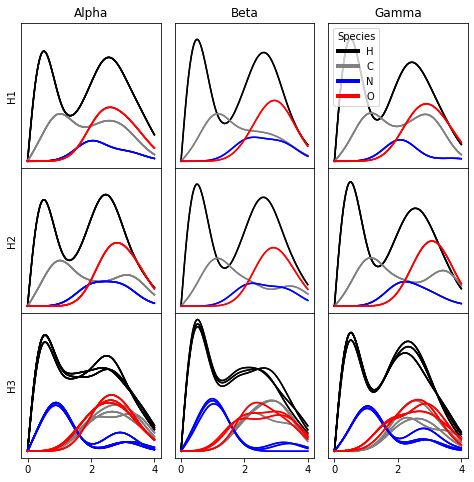

In [11]:
# g(r)

rcman = radial_soap.transform(alpha)
rcfeat = rcman.get_features(radial_soap)
rcfeat = rcfeat.reshape(len(alpha), 4, -1)

fig, ax = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True)
for ji in range(1, 4):
    for i, s in enumerate([1, 6, 7, 8]):
        ax[ji-1][0].plot(rgrid,
                    (rcfeat[np.where(alpha_types == f"H{ji}")][:, i] @ gto).T,
                    c=colors[i],)
    ax[ji-1][0].set_yticks([])
    ax[ji-1][0].set_ylabel(f"H{ji}")
    
rcman = radial_soap.transform(beta)
rcfeat = rcman.get_features(radial_soap)
rcfeat = rcfeat.reshape(len(beta), 4, -1)

for ji in range(1, 4):
    for i, s in enumerate([1, 6, 7, 8]):
        ax[ji-1][1].plot(rgrid,
                    (rcfeat[np.where(beta_types == f"H{ji}")][:, i] @ gto).T,
                    c=colors[i],)
    
rcman = radial_soap.transform(gamma)
rcfeat = rcman.get_features(radial_soap)
rcfeat = rcfeat.reshape(len(gamma), 4, -1)

for ji in range(1, 4):
    for i, s in enumerate([1, 6, 7, 8]):
        ax[ji-1][2].plot(rgrid,
                    (rcfeat[np.where(gamma_types == f"H{ji}")][:, i] @ gto).T,
                    c=colors[i],)
ax[0][-1].legend(custom_lines, ['H','C','N','O'], title='Species')
ax[0][0].set_title("Alpha")
ax[0][1].set_title("Beta")
ax[0][2].set_title("Gamma")

fig.subplots_adjust(hspace=0, wspace=0.1)

In [ ]:

#     ax[ji-1].set_ylabel(f"H{ji}")
# fig.subplots_adjust(hspace=0)
# fig.show()
# soap vectors -- let's not worry about this for now
# # fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# # for i in range(1, 4):
# #     h = np.where(alpha_types==f"H{i}")[0]
# #     print(h)
# #     ax[i - 1].plot(np.mean(alpha_soaps[h], axis=0))
# #     ax[i-1].set_yticks([])
# #     ax[i-1].set_ylabel(f"H{i}")

# # ax[-1].set_xticks(
# #     np.linspace(alpha_soaps.shape[-1] // 20, 19 * alpha_soaps.shape[-1] // 20,
# #                 10))
# # ax[-1].set_xticklabels(
# #     [(a,b) for a in [1,6,7,8] for b in [1,6,7,8] if a<=b])

# # fig.subplots_adjust(hspace=0)

# # fig.show()